In [1]:
import rasterio
from rasterio.merge import merge
import glob
from os.path import join
from os import makedirs

In [2]:
# Path to source TIF files
in_dir = "l:\\Slovenija\\DEM_zdruzeni_10m_D96"

# Make sure network drive is mapped
test = glob.glob(join(in_dir, "*"))
if len(test) == 0:
    !net use l: \\172.16.10.10\lidar /persistent:yes

In [3]:
# Path to output directory
out_dir = "d:\\test_merge_dem"

# MAke sure output flder exists
makedirs(out_dir, exist_ok=True)

Find all TIF files in the specified folder

In [18]:
q = join(in_dir, '*.tif')
dem_fps = glob.glob(q)

print(f"Source path: {q}")
print(f"Number of *.tif files found: {len(dem_fps)}")

Source path: l:\Slovenija\DEM_zdruzeni_10m_D96\*.tif
Number of *.tif files found: 133


In [19]:
# Open TIF files and store them as DataSets in the created list
src_all = []
for fp in dem_fps:
    src = rasterio.open(fp)
    src_all.append(src)
    
print(f"Opened {len(src_all)} source files.")

Opened 133 source files.


In [6]:
# Merge all DEMs and set nodata
mosaic, out_trans = merge(src_all, nodata=-999)

In [20]:
# Close source files after reading all the required data
for ds in src_all:
    ds.close()

In [21]:
# Source TIF files have no CRS assigned. Use CRS object o assign correct CRS.
from rasterio.crs import CRS
crs_slo = CRS.from_epsg(3794)

In [9]:
# Update metadata
out_meta = src_all[0].meta.copy()
out_meta.update({
    "driver": "GTiff",
    "height": mosaic.shape[1],
    "width": mosaic.shape[2],
    "transform": out_trans,
    "compress": "lzw",
    "bigtiff": "yes",
    "nodata": -999,
    "crs": crs_slo
})

In [10]:
# Set output path and save
out_pth = join(out_dir, "DEM_mozaik_10m_D96.tif")
with rasterio.open(out_pth, "w", **out_meta) as dest:
    dest.write(mosaic)

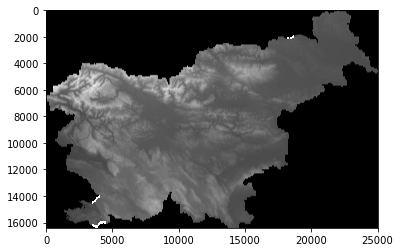

<AxesSubplot:>

In [17]:
from rasterio.plot import show
show(mosaic, cmap="gray")